**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#1D CNN for Natural Language Processing: Sentiment Analysis

<br>

**Introduction**   
This notebook demonstrates how to build and evaluate 1D Convolutional Neural Networks (CNNs) for sentiment analysis on text data. We'll use the IMDB movie reviews dataset to classify reviews as positive or negative, and compare both single-layer and multi-layer CNN architectures.

Follow the instructions in the code cells to complete and test your code. You will replace all triple underscores (___) with your code. Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.

#Step 1: Environment Setup and Imports   

Run the following cell to import the libraries, set the seeds for reproducibility so that your code outputs can be checked, and load/preprocess the IMDB dataset, which contains movie reviews labeled as positive or negative sentiment.   

No coding needed.  Run this cell to set up your environment and load the dataset.

In [ ]:
# Environment setup and dataset load functions
# No coding needed.  Run this cell to set up your environment and load the dataset.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, MaxPooling1D
import os
import random

# Set random seeds for reproducibility
def set_seeds(seed=42):
    # Set seeds for Python, NumPy, and TensorFlow
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Force TensorFlow to use single thread
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_NUM_INTRAOP_THREADS'] = '1'
    os.environ['TF_NUM_INTEROP_THREADS'] = '1'

    # Force cuDNN to disable auto-tuning
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

    print("Random seeds have been set to:", seed)

# Load and prepare the data
def load_preprocess_imdb_data():
    # Load IMDB data
    max_features = 10000  # Top 10,000 most frequent words
    max_len = 200  # Limit reviews to 200 words

    print("Loading IMDB dataset...")
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
    print(f"Dataset loaded. Training samples: {len(X_train)}, Test samples: {len(X_test)}")

    # Pad sequences to ensure uniform length
    X_train = pad_sequences(X_train, maxlen=max_len)
    X_test = pad_sequences(X_test, maxlen=max_len)

    # Limit to 5000 training examples for faster experimentation
    train_size = 5000
    X_train = X_train[:train_size]
    y_train = y_train[:train_size]

    # Limit to 1000 test examples
    test_size = 1000
    X_test = X_test[:test_size]
    y_test = y_test[:test_size]

    print(f"Using {train_size} training samples and {test_size} test samples")

    return (X_train, y_train), (X_test, y_test), max_features, max_len

#Step 2:  Model Architecture   

The general architecture for text classification with 1D CNNs typically includes:   
- Embedding Layer: Converts word indices to dense vectors
- 1D Convolutional Layer(s): Applies filters to detect patterns
- Pooling Layer: Extracts the most important features
- Dense Layers: Performs classification based on extracted features

##Step 2a:  Single-Layer 1D CNN   

This function creates a CNN model with a single convolutional layer, followed by global max pooling and dense layers.

      def create_single_layer_cnn(vocab_size, embedding_dim, input_length):
          """
          Creates a CNN model with a single convolutional layer.

          Parameters:
          - vocab_size: Size of the vocabulary
          - embedding_dim: Dimension of word embeddings
          - input_length: Maximum length of input sequences

          Returns:
          - A compiled Keras model
          """

In [ ]:
# Step 2a: Implement the Single-Layer 1D CNN

def create_single_layer_cnn(vocab_size, embedding_dim, input_length):
    """
    Creates a CNN model with a single convolutional layer.

    Parameters:
    - vocab_size: Size of the vocabulary
    - embedding_dim: Dimension of word embeddings
    - input_length: Maximum length of input sequences

    Returns:
    - A compiled Keras model
    """

    # Set seeds before model creation
    set_seeds(42)       #For reproducibility, do not change

    # Create a Keras Sequential model comprised of the following layers:
    #   1. Embedding:
    #      Set embeddings_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility
    #   2. 1D Convolutional:
    #      Set 128 filters with kernel size 5 and ReLU activation.
    #      Set kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility
    #   3. 1D Global Max Pooling:
    #   4. Dense:
    #      Set 64 notes, ReLU activation.
    #      Set kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility
    #   5. Dropout:
    #      Set 50% dropout rate and seed=42 for reproducibility
    #   6. Dense:
    #      Set 1 output node, Sigmoid activation.
    #      Set kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility

    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length, embeddings_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
        Conv1D(filters=128,kernel_size=5, activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
        GlobalMaxPooling1D(),
        Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
        Dropout(0.5, seed=42),
        Dense(1,activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
    ])

    return model

##Step 2b:  Multi-Layer 1D CNN   

This function implements a more complex CNN with multiple convolutional layers and pooling operations.

      def create_multi_layer_cnn(vocab_size, embedding_dim, input_length):
      """
      Creates a CNN model with multiple convolutional layers.

      Parameters:
      - vocab_size: Size of the vocabulary
      - embedding_dim: Dimension of word embeddings
      - input_length: Maximum length of input sequences

      Returns:
      - A compiled Keras model
      """

In [ ]:
# Step 2b: Implement the Multi-Layer 1D CNN

def create_multi_layer_cnn(vocab_size, embedding_dim, input_length):
    """
    Creates a CNN model with multiple convolutional layers.

    Parameters:
    - vocab_size: Size of the vocabulary
    - embedding_dim: Dimension of word embeddings
    - input_length: Maximum length of input sequences

    Returns:
    - A compiled Keras model
    """

    # Set seeds before model creation
    set_seeds(42)       #For reproducibility, do not change

    # Create a Keras Sequential model comprised of the following layers:
    #   1. Embedding:
    #      Set embeddings_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility
    #   2. 1D Convolutional:
    #      Set 64 filters with kernel size 3 and ReLU activation.
    #      Set kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility
    #   3. 1D Max Pooling:
    #      Set pool size of 2.
    #   4. 1D Convolutional:
    #      Set 128 filters with kernel size 3 and ReLU activation.
    #      Set kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility
    #   5. 1D Global Max Pooling:
    #   4. Dense:
    #      Set 64 notes, ReLU activation.
    #      Set kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility
    #   5. Dropout:
    #      Set 50% dropout rate and seed=42 for reproducibility
    #   6. Dense:
    #      Set 1 output node, Sigmoid activation.
    #      Set kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42) for reproducibility

    model = Sequential([
            Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length, embeddings_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
            Conv1D(filters=64, kernel_size=3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
            MaxPooling1D(pool_size=2),
            Conv1D(filters=128, kernel_size=3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
            GlobalMaxPooling1D(),
            Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
            Dropout(0.5, seed=42),
            Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
    ])

    return model

#Step 3:  Model Training and Evaluation  

This function handles the training and evaluation of both models, allowing for a direct comparison of their performance.

In [ ]:
#Step 3: Train and evaluate the models

def train_and_evaluate_models():

    # Reset seeds for reproducibility again before model creation
    set_seeds(42)       #For reproducibility, do not change

    # Load data using the provided function call.
    (X_train, y_train), (X_test, y_test), max_features, max_len = load_preprocess_imdb_data()

    # Set embedding dimension  - for reproducibility, do not change
    embedding_dim = 10

    # Create models
    # Set up your single layer and multi layer models in a dictionary
    print("\nCreating models...")
    models = {
        'single_layer_cnn': create_single_layer_cnn(max_features, embedding_dim, max_len),
        'multi_layer_cnn': create_multi_layer_cnn(max_features, embedding_dim, max_len)
    }

    # Configure optimizers
    # Set up both optimizers to Adam with learning rate = 0.001
    optimizers = {
        'single_layer_cnn': tf.keras.optimizers.Adam(learning_rate=0.001),
        'multi_layer_cnn': tf.keras.optimizers.Adam(learning_rate=0.001)
    }

    # Set batch sizes and epochs
    # Set up both batch sizes to 32
    batch_sizes = {
        'single_layer_cnn': 32,
        'multi_layer_cnn': 32
    }


    # Set up both epochs to 3
    epochs = {
        'single_layer_cnn': 3,
        'multi_layer_cnn': 3
    }

    # Train models and store histories

    # Initialize a dictionary to store the model training histories
    histories = {}

    # Loop through the models
    for model_name, model in models.items():
        print(f"\nTraining {model_name}")

        # Set seeds before compilation, for reproducibility - do not change
        set_seeds(42)

        # Compile the model
        # Set the optimizers to the data structure created previously
        # Set the loss to binary cross entropy
        # Store the accuracy metrics
        model.compile(
            optimizer= optimizers[model_name],
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )

        # Set seeds before fitting
        set_seeds(42)

        # Fit the model
        # Use the split training data
        # Set the batch size, number of iterations (epochs) to the previously created data structure
        # Set the validation split to 80/20%
        # Set the verbose flag to print out training information to the console
        history = model.fit(X_train, y_train,
                            batch_size=batch_sizes[model_name],
                            epochs=epochs[model_name],
                            validation_split=0.2,
                            verbose=1
        )

        # Store the model histories
        histories[model_name] = history.history



    # Create visualization and print the final metrics
    # No coding needed, you may use the provided code below
    plt.figure(figsize=(15, 6))

    # Plot training loss
    plt.subplot(1, 2, 1)
    for model_name in histories:
        plt.plot(histories[model_name]['loss'],
                 label=f'{model_name}')
    plt.title('Training Loss vs Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    for model_name in histories:
        plt.plot(histories[model_name]['accuracy'],
                 label=f'{model_name}')
    plt.title('Training Accuracy vs Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print final metrics for all models
    print("\nFinal Training Metrics:")
    for model_name in histories:
        final_loss = histories[model_name]['loss'][-1]
        final_acc = histories[model_name]['accuracy'][-1]
        print(f"\n{model_name}:")
        print(f"  Loss: {final_loss:.4f}")
        print(f"  Accuracy: {final_acc:.4f}")

        # Evaluate on test set
        test_loss, test_acc = models[model_name].evaluate(X_test, y_test, verbose=0)
        print(f"  Test Accuracy: {test_acc:.4f}")

    return models, histories, (X_test, y_test)

#Step 4:  Analyzing Model Predictions   

This function examines and compares predictions from both models on specific examples from the test set.

    def analyze_predictions(models, X_test, y_test):
        """
        Analyzes and compares predictions from multiple models on sample test examples.
        
        Parameters:
        - models: Dictionary mapping model names to trained model instances
        - X_test: Test features (padded sequences of word indices)
        - y_test: Test labels (binary sentiment: 0 for negative, 1 for positive)
        
        Returns:
        - None, but prints prediction analysis for random test examples
        """

In [ ]:
# Step 4: Analyze model predictions

def analyze_predictions(models, X_test, y_test):
    """
    Analyzes and compares predictions from multiple models on sample test examples.

    Parameters:
    - models: Dictionary mapping model names to trained model instances
    - X_test: Test features (padded sequences of word indices)
    - y_test: Test labels (binary sentiment: 0 for negative, 1 for positive)

    Returns:
    - None, but prints prediction analysis for sample test examples
    """
    # Set seed for reproducibility - do not change
    set_seeds(42)

    # Get word index mapping using provided code
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}

    # Function to decode review
    def decode_review(text):
        return ' '.join([reverse_word_index.get(i - 3, '?') for i in text if i > 3])

    # Select a few examples for analysis with fixed seed
    num_examples = 5
    np.random.seed(42)  # Ensure consistent random indices for reproducible results - do not change
    sample_indices = np.random.randint(0, len(X_test), num_examples)

    # Loop through sample indices to access the reviews
    for i, idx in enumerate(sample_indices):

        # Get a review from the test set and its corresponding sentiment based on idx
        review = X_test[idx]
        true_sentiment = y_test[idx]

        print(f"\nExample {i+1}:")
        print(f"Review (truncated): {decode_review(review[:50])}...")
        print(f"True sentiment: {'Positive' if true_sentiment == 1 else 'Negative'}")

        # Loop through the models
        for model_name, model in models.items():

            # Make predictions
            # Hint:  expand the dimensions along axis 0 and access the prediction attribute
            # Hint:  https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
            prediction = model.predict(np.expand_dims(review, axis=0))

            # Set the sentiment to 'Positive' if the prediction is over 0.5 otherwise set to 'Negative'
            predicted_sentiment = 'Positive' if prediction > 0.5 else 'Negative'

            # Calculate confidence as the maximum of the prediction or 1-prediction
            confidence = max(prediction[0][0], 1 - prediction[0][0])
            print(f"{model_name} prediction: {predicted_sentiment} (confidence: {confidence:.2f})")

#Step 5:  Main execution   

For validation testing.  No coding needed here.   

Run the cell, verify the doctests pass, and use the output for the following reflection questions.

Random seeds have been set to: 42
Random seeds have been set to: 42
Loading IMDB dataset...
Dataset loaded. Training samples: 25000, Test samples: 25000
Using 5000 training samples and 1000 test samples

Creating models...
Random seeds have been set to: 42
Random seeds have been set to: 42

Training single_layer_cnn
Random seeds have been set to: 42
Random seeds have been set to: 42
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5243 - loss: 0.6930 - val_accuracy: 0.6890 - val_loss: 0.6607
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7112 - loss: 0.5998 - val_accuracy: 0.7770 - val_loss: 0.4749
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8345 - loss: 0.4063 - val_accuracy: 0.8140 - val_loss: 0.4239

Training multi_layer_cnn
Random seeds have been set to: 42
Random seeds have been set to: 42
Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5234 - loss: 0.6923 - val_accuracy: 0.7090 - val_loss: 0.6026
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7436 - loss: 0.5447 - val_accuracy: 0.7770 - val_loss: 0.4784
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8519 - loss: 0.3596 - val_accuracy: 0.7580 - val_loss: 0.5355


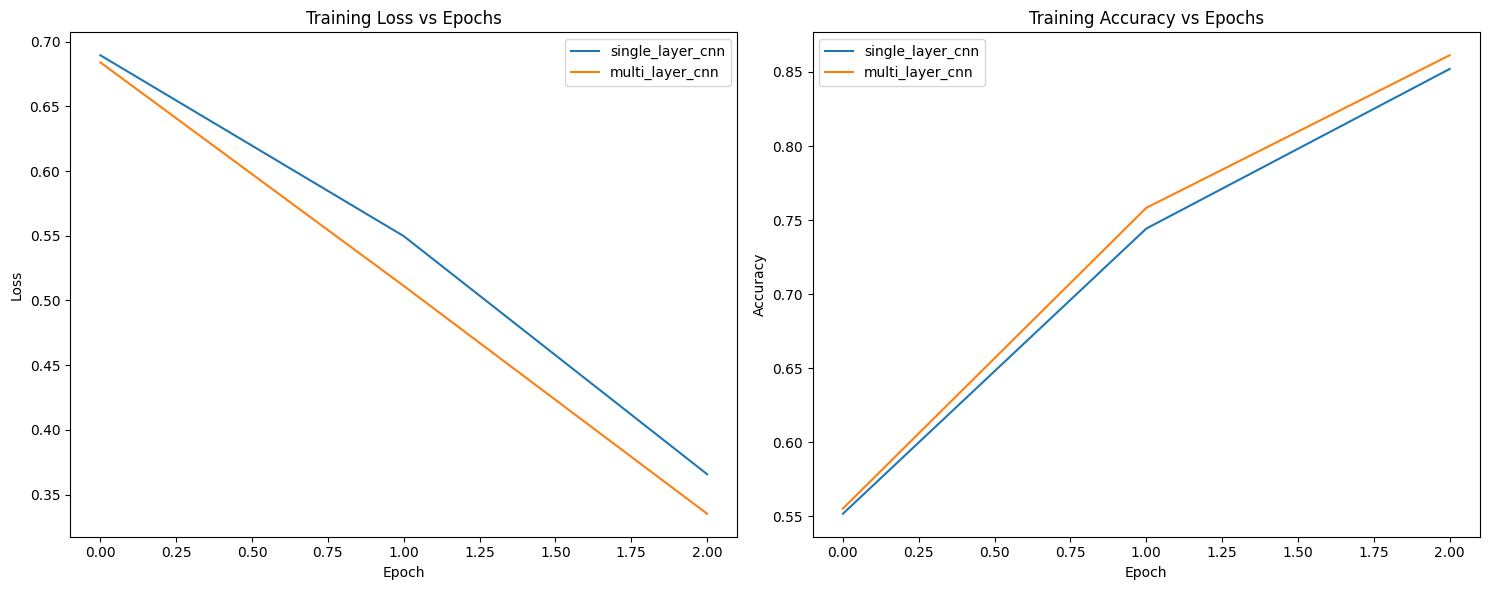


Final Training Metrics:

single_layer_cnn:
  Loss: 0.3657
  Accuracy: 0.8520
  Test Accuracy: 0.8160

multi_layer_cnn:
  Loss: 0.3351
  Accuracy: 0.8612
  Test Accuracy: 0.7700
Random seeds have been set to: 42
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Example 1:
Review (truncated): graphics not up to 2003 standards br br the action is presented as a series of flashbacks the aged is so we get a quick look at some historical events some of which are presented well whereas some are not an amount of time is wasted to show...
True sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
single_layer_cnn prediction: Negative (confidence: 0.93)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
multi_layer_cnn prediction: Negative (confidence: 0.84)

Example 2:
Review (truncated): spoilers br br where do i begin with just how silly...
True sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
single_layer_cnn prediction: Negative (confidence: 0.96)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
mu

TestResults(failed=0, attempted=8)

In [ ]:
# At the beginning of main execution
if __name__ == "__main__":
    # Set global seeds
    set_seeds(42)

    # Train and evaluate models
    models, histories, (X_test, y_test) = train_and_evaluate_models()

    # Fix the random indices for prediction analysis
    analyze_predictions(models, X_test, y_test)





# For validation tests - do not change the code below this line
import doctest
"""
  >>> np.isclose(histories['single_layer_cnn']['loss'][-1], 0.374014675617218, atol=1e-1)
  np.True_
  >>> np.isclose(histories['single_layer_cnn']['accuracy'][-1], 0.8477500081062317, atol=1e-1)
  np.True_
  >>> np.isclose(models['single_layer_cnn'].evaluate(X_test, y_test, verbose=0)[0], 0.42423829436302185, atol=1e-1)
  np.True_
  >>> np.isclose(models['single_layer_cnn'].evaluate(X_test, y_test, verbose=0)[1], 0.8009999990463257, atol=1e-1)
  np.True_
  >>> np.isclose(histories['multi_layer_cnn']['loss'][-1], 0.33380600810050964, atol=1e-1)
  np.True_
  >>> np.isclose(histories['multi_layer_cnn']['accuracy'][-1], 0.8647500276565552, atol=1e-1)
  np.True_
  >>> np.isclose(models['multi_layer_cnn'].evaluate(X_test, y_test, verbose=0)[0], 0.4696541130542755, atol=1e-1)
  np.True_
  >>> np.isclose(models['multi_layer_cnn'].evaluate(X_test, y_test, verbose=0)[1], 0.796999990940094, atol=1e-1)
  np.True_
"""

doctest.testmod()

#Reflection Questions   

Review your notebook results and answer the following reflection questions:   

1. How did the single-layer CNN perform compared to the multi-layer CNN?
2. What are the advantages of using CNNs for text classification?
3. How might you further improve these models?
4. Why might the single-layer CNN have outperformed the multi-layer CNN in our experiments?

1. How did the single-layer CNN perform compared to the multi-layer CNN?

   **My Ans:** From the two graphs, the change in loss of single-layer CNN resembles that of multi-layer CNN. However, we can see that multi-layer CNN outperforms the single-layer CNN, which makes sense since single-layer CNN is a relatively "simpler" model.

2. What are the advantages of using CNNs for text classification?

   **My Ans:**  Firstly, we don't need much text preprocessing, CNN can automatically extract features, so it would be "easier to use" than the other text classification models. Also, CNN is good at detecting n-gram features and capture patterns.

3. How might you further improve these models?

   **My Ans:** I might improve the model by tuning for better hyperparameters and adjusting the pipelines. Also, I can add the embedding methods, which we learned from the last two classes to this CNN.

4. Why might the single-layer CNN have outperformed the multi-layer CNN in our experiments?

​   **My Ans:** We only have 3 epochs, and this may not be enough for a complex model. Also, maybe we can find better hyperparameters for the multi-layer CNN model.